# Problem 1: Observation Distances
In this exercise, we visualize the relationship between observations and a linear decision boundary by projecting each data point orthogonally onto the line and measuring the distance. The resulting plot shows line segments from each observation to the model, colored by their distance, highlighting how far each point lies from the decision boundary.

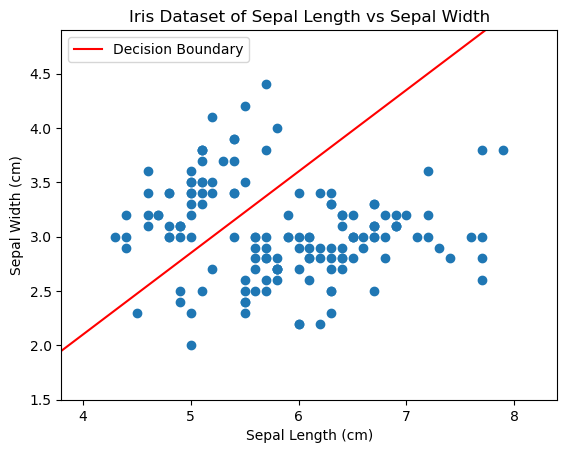

In [ ]:

"""

    1. load in the IRIS dataset and put the first two features into a feature matrix. We now plot these observations.
    2. plot the decision boundary on the figure x2 = 0.75 x1 - 0.9

"""

# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
iris_df = pd.read_csv("C:/GitHub/Semester 5/TheoryOfMachineLearning/6_week-six/pset/Data/IRIS.csv")
feature_matrix = iris_df.iloc[:, :2].values

# the min and max of the axes
x_min = feature_matrix[:, 0].min()
x_max = feature_matrix[:, 0].max()
y_min = feature_matrix[:, 1].min()
y_max = feature_matrix[:, 1].max()

# plotting the iris dataset
plt.scatter(feature_matrix[:, 0], feature_matrix[:, 1])
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Iris Dataset of Sepal Length vs Sepal Width")

# setting the axis limits
plt.xlim(x_min - 0.5, x_max + 0.5)
plt.ylim(y_min - 0.5, y_max + 0.5)

# plotting the linear decisio n boundary
x1_values = np.linspace(x_min - 0.5, x_max + 0.5, 200)
x2_values = 0.75 * x1_values - 0.9
plt.plot(x1_values, x2_values, color='red', label='Decision Boundary')

# display the plot
plt.legend()
plt.show()



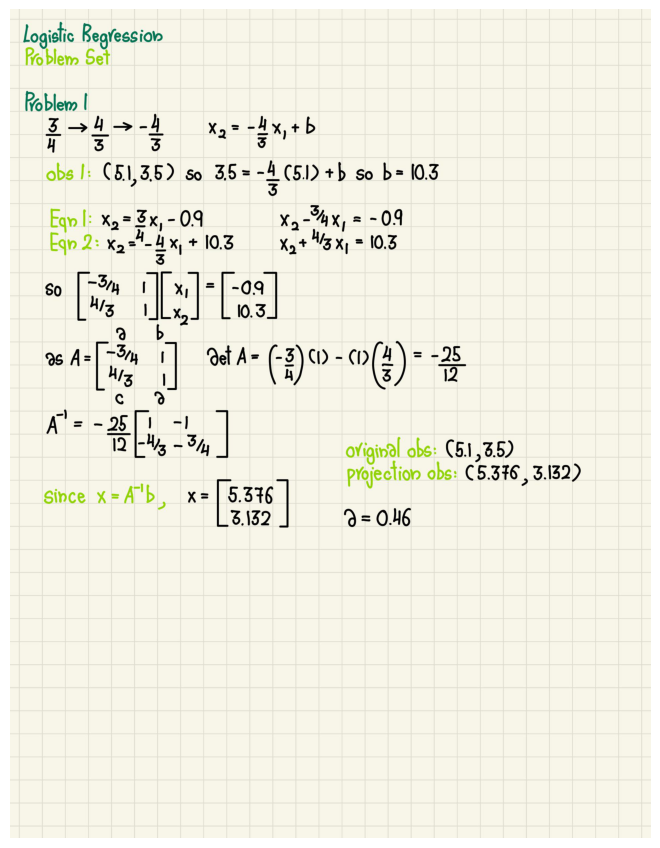

In [24]:

"""

    3. performing the rough calculations

"""


# importing libraries
import matplotlib.image as mpimg

# load the image
img = mpimg.imread('C:/GitHub/Semester 5/TheoryOfMachineLearning/6_week-six/pset/images/ml.jpg')  

# display the image
plt.figure(figsize=(8.27, 11.69))
plt.imshow(img)
plt.axis('off')
plt.show()





C:\Users\chowdhuryj\AppData\Local\Temp\ipykernel_29616\3516767790.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


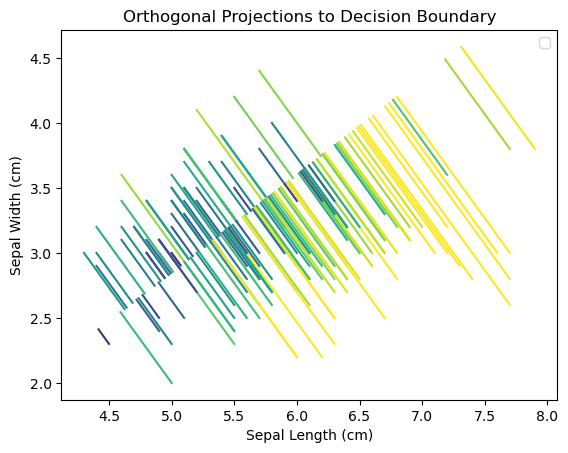

In [29]:

"""

    3. add a vector that connects the point on the model to the observation in space and color it
    3. do this for all observations in the dataset

"""

slope = 3/4
intercept = -0.9

maximum_distance = 0

for x, y in feature_matrix:

    # slope and intercept
    perpendicular_slope = -4/3
    perpendicular_intercept = y - perpendicular_slope * x

    # intersection
    x_proj = (perpendicular_intercept - intercept) / (slope - perpendicular_slope)
    y_proj = slope * x_proj + intercept

    # distance between observation and projection
    distance = np.sqrt((x_proj - x)**2 + (y_proj - y)**2)
    maximum_distance = max(maximum_distance, distance)

    # plotting the line segment
    plt.plot([x, x_proj], [y, y_proj], color=plt.cm.viridis(distance / 1.0))


# labels and legend
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Orthogonal Projections to Decision Boundary")
plt.legend()
plt.show()


# Problem 2: ROC Curves from Scratch
In this problem, we walk through creating a Receiver Operator Characteristic (ROC) curve from scratch. Most classifiers can output a continuous-valued "score", not just a categorical class label. This score represents the confidence of the classifier in its decision.

Some classifiers such as logisitic regression and Naive Bayes are able to predict not just a score but the probability P(y = 1 | x) that a sample with feature vector x belongs to class one.

A ROC curve allows us to see how different thresholds for the score produce different trade-offs between true and false positive rates. The true positive rate indicates what fraction of the position predictions are correct, while the false positive indicates what fraction of the negatives are mis-preidcted as positives.


In [35]:

"""

    1. load the data in the provided results.csv file
        a. the first column contains the estimated probabilities that the observation belongs to class 1
        b. the second column contains the true labels (either 0 or 1)

    2. we use three thresholds (0.25, 0.5 and 0.75) for the scores to get binary predicted labels
        a. if the score for an observation is less than the threshold, its predicted label should be 0
        b. otherwise the predicted label should be 1

    3. for each threshold, create a confusion matrix

"""

# importing required libraries
from sklearn.metrics import confusion_matrix

# loading the dataset
results_df = pd.read_csv("C:/GitHub/Semester 5/TheoryOfMachineLearning/6_week-six/pset/data/results.csv")

# extracting scores and true labels
scores = results_df.iloc[:, 0]
true_labels = results_df.iloc[:, 1]

# using thresholds to evalaute
thresholds = [0.25, 0.5, 0.75]
predicted_labels = {}

# printing out the thresholds
for t in thresholds:
    predicted_labels[t] = (scores >= t).astype(int)
    cm = confusion_matrix(true_labels, predicted_labels[t])
    print(f"Confusion Matrix for Threshold {t}")
    print(cm)
    print()


Confusion Matrix for Threshold 0.25
[[ 2437  4104]
 [  468 12990]]

Confusion Matrix for Threshold 0.5
[[ 3145  3396]
 [  667 12791]]

Confusion Matrix for Threshold 0.75
[[ 3859  2682]
 [  931 12527]]



In [36]:

"""

    4. for each confusion matrix, calculate the true and false positive rates.
    5. create a list of all unique scores and sort them from highest to lowest
        a. use each score as a threshold and predict the true and false positive rates


"""

roc_one = []

# calculating the true and false positive rates
for t in thresholds:

    predicted_labels[t] = (scores >= t).astype(int)
    cm = confusion_matrix(true_labels, predicted_labels[t])
    true_neg, false_pos, false_neg, true_pos = cm.ravel()
    tpr = true_pos / (true_pos + false_neg)
    fpr = false_pos / (false_pos + true_neg)
    roc_one.append((fpr, tpr))


unique_scores = sorted(scores.unique(), reverse=True)
roc_two = []

# predict trp and fpr using unique scores
for t in unique_scores:

    predicted_labels[t] = (scores >= t).astype(int)
    cm = confusion_matrix(true_labels, predicted_labels[t])
    true_neg, false_pos, false_neg, true_pos = cm.ravel()
    tpr = true_pos / (true_pos + false_neg)
    fpr = false_pos / (false_pos + true_neg)
    roc_two.append((fpr, tpr))


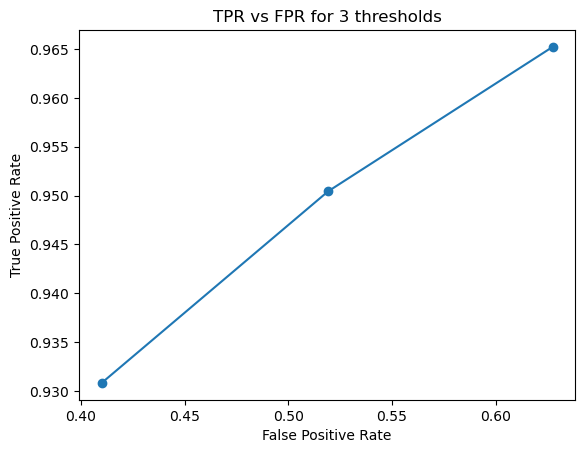

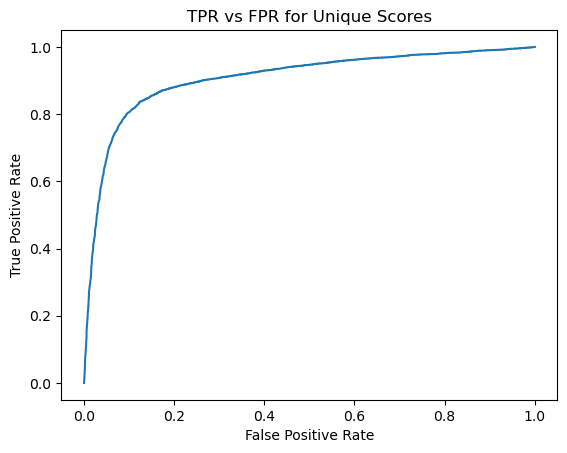

In [43]:

"""

    6. use the threshold to predict the labels for each observation
    7. calculate the true and false positive rates
    8. plot the true (horizontal) and false (vertical) positive rates for each threshold

"""

# split the points into X and Y for plotting
true_pos_rates_one, false_pos_rates_one = zip(*roc_one)
true_pos_rates_two, false_pos_rates_two = zip(*roc_two)

plt.plot(true_pos_rates_one, false_pos_rates_one, marker='o', linestyle='-')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TPR vs FPR for 3 thresholds")
plt.show()

plt.plot(true_pos_rates_two, false_pos_rates_two, linestyle='-')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TPR vs FPR for Unique Scores")
plt.show()